# Spam Detection Project Reproduce One-to-One

In [41]:
import os
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

ImportError: cannot import name 'chi2' from 'statsmodels.stats' (c:\Users\justy\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\stats\__init__.py)

Import the dataset:

In [16]:
os.chdir("C:\\Users\\justy\\Desktop\\Info\\Inne\\DSC\\UW\\Semestr II\\Econometrics\\Project")

spam = pd.read_csv("spambase.data", header=None)
names = pd.read_csv("names.csv", header=None)

In [9]:
spam.describe

<bound method NDFrame.describe of         0     1     2    3     4     5     6     7     8     9   ...     48  \
0     0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
1     0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.000   
2     0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.010   
3     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
4     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
...    ...   ...   ...  ...   ...   ...   ...   ...   ...   ...  ...    ...   
4596  0.31  0.00  0.62  0.0  0.00  0.31  0.00  0.00  0.00  0.00  ...  0.000   
4597  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4598  0.30  0.00  0.30  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.102   
4599  0.96  0.00  0.00  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4600  0.00  0.00  0.65  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   

         49   50 

In [17]:
names.describe

<bound method NDFrame.describe of                              0
0               word_freq_make
1            word_freq_address
2                word_freq_all
3                 word_freq_3d
4                word_freq_our
5               word_freq_over
6             word_freq_remove
7           word_freq_internet
8              word_freq_order
9               word_freq_mail
10           word_freq_receive
11              word_freq_will
12            word_freq_people
13            word_freq_report
14         word_freq_addresses
15              word_freq_free
16          word_freq_business
17             word_freq_email
18               word_freq_you
19            word_freq_credit
20              word_freq_your
21              word_freq_font
22               word_freq_000
23             word_freq_money
24                word_freq_hp
25               word_freq_hpl
26            word_freq_george
27               word_freq_650
28               word_freq_lab
29              word_freq_labs
30   

In [29]:
names.loc[48, 0] = "char_freq_semicolon"
names.loc[49, 0] = "char_freq_bracket"
names.loc[50, 0] = "char_freq_square_bracket"
names.loc[51, 0] = "char_freq_exclamation"
names.loc[52, 0] = "char_freq_dollar"
names.loc[53, 0] = "char_freq_hashtag"
names.loc[57, 0] = "spam"

In [30]:
spam.columns = names[0].values

spam.dropna(inplace=True)

In [32]:
spam.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


Let us check the distribution of spam and non-spam mails

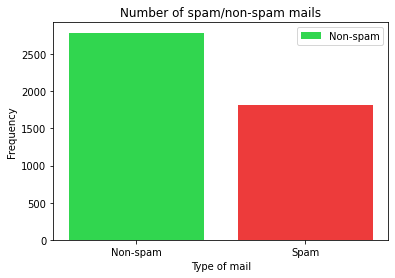

In [33]:
spam_count = spam["spam"].value_counts()
perc_yes = round(spam_count[1] / len(spam) * 100, 2)
perc_no = round(spam_count[0] / len(spam) * 100, 2)

plt.bar(["Non-spam", "Spam"], spam_count, color=["#31d64f", "#ed3b3b"])
plt.title("Number of spam/non-spam mails")
plt.xlabel("Type of mail")
plt.ylabel("Frequency")
plt.legend(["Non-spam", "Spam"])
plt.show()

## Start from the most general model that contains all explanatory variables

In [34]:
formula = "spam ~ " + " + ".join(spam.columns[:-1])

Probit model

In [35]:
myprobit = sm.Probit.from_formula(formula, data=spam).fit()
print(myprobit.summary())

Optimization terminated successfully.
         Current function value: 0.207573
         Iterations 15
                          Probit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 4601
Model:                         Probit   Df Residuals:                     4543
Method:                           MLE   Df Model:                           57
Date:                Thu, 15 Jun 2023   Pseudo R-squ.:                  0.6904
Time:                        21:36:26   Log-Likelihood:                -955.04
converged:                       True   LL-Null:                       -3085.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.8356      0.075    -11.098      0.000     

Logit model

In [36]:
mylogit = sm.Logit.from_formula(formula, data=spam).fit()
print(mylogit.summary())

Optimization terminated successfully.
         Current function value: 0.197323
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4543
Method:                           MLE   Df Model:                           57
Date:                Thu, 15 Jun 2023   Pseudo R-squ.:                  0.7057
Time:                        21:36:49   Log-Likelihood:                -907.88
converged:                       True   LL-Null:                       -3085.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.5686      0.142    -11.044      0.000     

# Significance test of models

Both models p-values are 0, so null hypothesis can be rejected. It means that the model`s coefficients are jointly significant

In [42]:
null_probit = sm.Probit(spam["spam"], sm.add_constant(pd.Series([1] * len(spam)))).fit()
probit_lrtest = stats.chi2.sf(2 * (myprobit.llf - null_probit.llf), 1)
print("Probit likelihood ratio test p-value:", probit_lrtest)

Optimization terminated successfully.
         Current function value: 0.670523
         Iterations 4
Probit likelihood ratio test p-value: 0.0


In [43]:
null_logit = sm.Logit(spam["spam"], sm.add_constant(pd.Series([1] * len(spam)))).fit()
logit_lrtest = stats.chi2.sf(2 * (mylogit.llf - null_logit.llf), 1)
print("Logit likelihood ratio test p-value:", logit_lrtest)

Optimization terminated successfully.
         Current function value: 0.670523
         Iterations 4
Logit likelihood ratio test p-value: 0.0


## Stepwise regression

In [ ]:
#Comment

In [ ]:
#comment2